<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')

print(dataset.head())
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])



  Sleep Stage  MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
0           W         0.00051           8.74146        18.48195   
1           W         0.00040          10.24000        17.48293   
2           W         0.00036           9.74049        17.98244   
3           W         0.00035          10.11512        17.60780   
4           W         0.00033           9.74049        17.60780   

   Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
0                17.48293         8.24195        0.00071         19.73073   
1                16.85854        10.61463        0.00051         17.23317   
2                17.48293         8.74146        0.00047         17.60780   
3                17.10829         9.61561        0.00047         17.35805   
4                17.23317         8.11707        0.00043         17.23317   

   MeanF_Beta_F4  Spectral Edge_Beta_F4  ...  MeanP_Delta_O2  \
0       29.84585               33.84195  ...         0.00724   
1     

In [17]:
X= dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
xgb_classifier = xgb.XGBClassifier()

In [20]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [21]:
predictions = xgb_classifier.predict(X_test)

In [22]:
predictions

array(['N2', 'R', 'N2', ..., 'N3', 'W', 'N2'], dtype=object)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("Accurecy: ",accuracy_score(y_test, predictions))

[[ 487  699   29  460  693]
 [ 152 6302  745  419  273]
 [   5 1061 3150    3   35]
 [ 148  774   59 2286  107]
 [ 187  225   23   73 3296]]
              precision    recall  f1-score   support

          N1       0.50      0.21      0.29      2368
          N2       0.70      0.80      0.74      7891
          N3       0.79      0.74      0.76      4254
           R       0.71      0.68      0.69      3374
           W       0.75      0.87      0.80      3804

    accuracy                           0.72     21691
   macro avg       0.69      0.66      0.66     21691
weighted avg       0.70      0.72      0.70     21691

Accurecy:  0.7155502282052464


Text(114.0, 0.5, 'Truth')

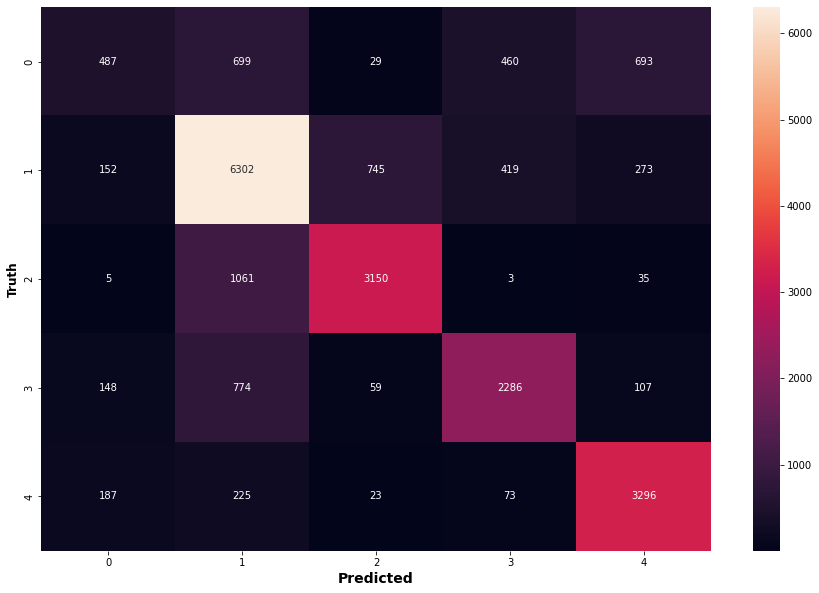

In [24]:
cm = confusion_matrix(y_test, predictions)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

In [25]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [26]:
confusion_details(y_test,predictions)

Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']
     N1    N2    N3     R     W
N1  487   699    29   460   693
N2  152  6302   745   419   273
N3    5  1061  3150     3    35
R   148   774    59  2286   107
W   187   225    23    73  3296

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'N1': 487, 'N2': 6302, 'N3': 3150, 'R': 2286, 'W': 3296}
False Positives(FP): {'N1': 492, 'N2': 2759, 'N3': 856, 'R': 955, 'W': 1108}
True Negatives(TN): {'N1': 18831, 'N2': 11041, 'N3': 16581, 'R': 17362, 'W': 16779}
False Negatives(FN): {'N1': 1881, 'N2': 1589, 'N3': 1104, 'R': 1088, 'W': 508}
----------------------------
Precision: {'N1': 0.4974463738508682, 'N2': 0.6955082220505463, 'N3': 0.7863205192211683, 'R': 0.7053378586855908, 'W': 0.7484105358764759}
Recall/Sensitivity: {'N1': 0.20565878378378377, 'N2': 0.79863135217336